In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as df

In [39]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [40]:
file_name

'D:/BISMARK/_shp/CATASTRO220410.shp'

In [43]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

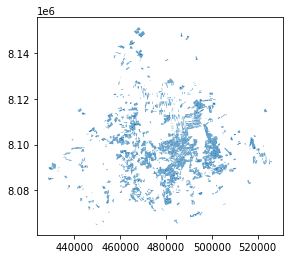

In [44]:
data.plot()
plt.show()

In [29]:
data.crs.name

'WGS 84 / UTM zone 20S'

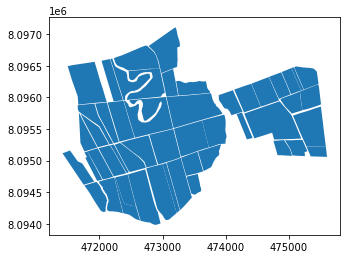

In [34]:
propiedad = data[data['unidad_01']==17]
propiedad.plot()
plt.show()

In [46]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financiami,gestion,soca,cultivo,ins,area,geometry
1119,0000170000C3,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,24.116236,"POLYGON Z ((472922.790 8094188.685 0.000, 4729..."
1120,0000170000C4,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1121,0000170000B6.2,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,2020,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."


In [55]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']

In [56]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financiami,soca,cultivo,zona,area,geometry
1099,0000170000C3,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,2,canha,50,24.14,"POLYGON Z ((472922.790 8094188.685 0.000, 4729..."
1100,0000170000C4,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,2,canha,50,5.63,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1101,0000170000B6.2,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,2,canha,50,7.60,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."
1102,0000170000C10,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C10,RBB 77-26,2020-04-13,FY,IAG,2,canha,50,2.20,"POLYGON Z ((472197.682 8095204.835 0.000, 4721..."
1103,0000170000C5,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C5,CITTCA 85-22,2020-05-07,FA,IAG,2,canha,50,11.01,"POLYGON Z ((472152.922 8094712.295 0.000, 4721..."


In [57]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [58]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [59]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financiami,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1099,0000170000C3,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,...,24.14,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C3,0
1100,0000170000C4,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,...,5.63,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C4,0
1101,0000170000B6.2,17,LA_ESTACADA--OLGUITA,8003,AGUILERA_RIVERO_SERGIO_STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,...,7.60,CITTCA 85-22,2020-04-13,2,,0,8003,17,0000170000B6.2,0


In [60]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financiami', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [61]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [62]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1099,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.14,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C3,0
1100,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.63,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C4,0
1101,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.60,CITTCA 85-22,2020-04-13,2,,0,8003,17,0000170000B6.2,0
1102,"POLYGON Z ((472197.682 8095204.835 0.000, 4721...",C10,FY,2.20,RBB 77-26,2020-04-13,2,,0,8003,17,0000170000C10,0
1103,"POLYGON Z ((472152.922 8094712.295 0.000, 4721...",C5,FA,11.01,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C5,0


In [63]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [64]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [65]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [45]:
propiedad.head()

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financiami,gestion,soca,cultivo,ins,area,geometry
1119,0000170000C3,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,24.116236,"POLYGON Z ((472922.790 8094188.685 0.000, 4729..."
1120,0000170000C4,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1121,0000170000B6.2,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,2020,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."
1122,0000170000C10,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C10,RBB 77-26,2020-04-13,FY,IAG,2020,2,canha,50,2.194301,"POLYGON Z ((472197.682 8095204.835 0.000, 4721..."
1123,0000170000C5,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C5,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,10.997715,"POLYGON Z ((472152.922 8094712.295 0.000, 4721..."


In [67]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [68]:
tchs = pd.read_excel(fp_tch)

In [69]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO '] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [70]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1099,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.14,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C3,0
1100,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.63,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C4,0
1101,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.60,CITTCA 85-22,20200413,2,SOCA,50.058121,8003,17,0000170000B6.2,0


In [71]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [73]:
bloques = pd.read_excel(fp_bloques)

In [74]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [75]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [76]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1099,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.14,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C3,359
1100,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.63,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C4,359
1101,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.60,CITTCA 85-22,20200413,2,SOCA,50.058121,8003,17,0000170000B6.2,359


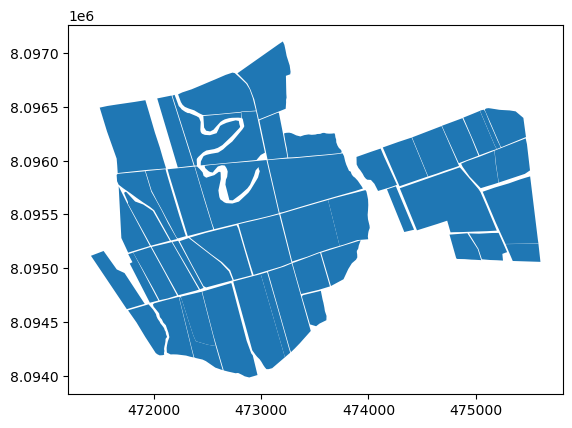

In [77]:
propiedad.plot()
plt.show()

In [78]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 66°W to 60°W - by country
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
propiedad = propiedad.to_crs(epsg=4326)

In [80]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
file_name

'17_LA_ESTACADA--OLGUITA'

In [96]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\SPH_WGS84")

In [97]:
out_dir = os.path.normpath((os.getcwd() + '/LA_ESTACADA.geojson' ))

In [105]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\UTEA_2022\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\SPH_WGS84\\LA_ESTACADA.geojson'

In [106]:
propiedad.to_file(out_dir, driver='GeoJSON')

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
